# Mahine Learning, Visualized

We'll look at some simple models and see the differences in "learning" introduced by algorithm choice. 

Since this is just a demo, I'll be hiding most of the code. Feel free to download and check any of the functionality for yourself. 

## Data
To begin, let's get a test dataset together. I stole it from [this Kaggle page](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance?resource=download). 

In [1]:
## prereqs
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
## Searches for the dataset in this notebook file's nearest directory.
from os import getcwd
filepath = f"{getcwd()}\\stuData.csv"
stu_df = pd.read_csv(filepath)
stu_df.head(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


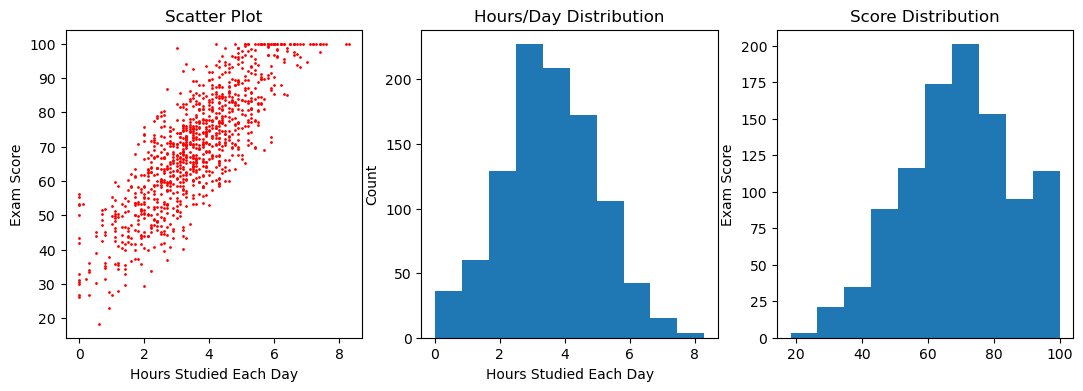

In [3]:
## looking for a linear correlation
## From my time as a teacher, I suspsect study hours and score to be linearly related
fig, ax = plt.subplots(1, 3, figsize = (13, 4))
ax[0].set_ylabel("Exam Score")
ax[0].set_xlabel("Hours Studied Each Day")
ax[0].plot(
    stu_df.study_hours_per_day, 
    stu_df.exam_score, 
    'ro', markersize = 1.0
)
ax[0].set_title("Scatter Plot")

ax[1].hist(
    stu_df.study_hours_per_day
)
ax[1].set_title("Hours/Day Distribution")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Hours Studied Each Day")

ax[2].hist(
    stu_df.exam_score
)

ax[2].set_title("Score Distribution")
ax[2].set_ylabel("Count")
ax[2].set_ylabel("Exam Score")

plt.show()

As suspected, we get a fairly linear correlation with reasonable noise. It should be a fine example to begin making a linear correlation model with.

In the context of the example, our predictor is a straight line. This means the model is very simple. For a given number of hours studied, the model returns their expected exam grade. An example of this is shown below, with me just kinda eyeballing it.

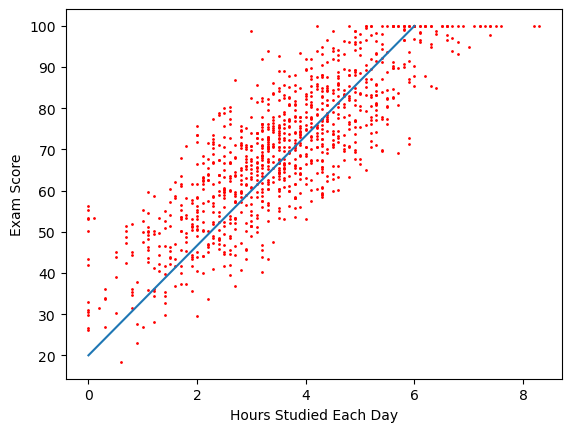

In [4]:
fig, ax = plt.subplots()
ax.set_ylabel("Exam Score")
ax.set_xlabel("Hours Studied Each Day")
ax.plot(
    stu_df.study_hours_per_day, 
    stu_df.exam_score, 
    'ro', markersize = 1.0
)
elis_guess = ([0, 6], [20, 100])
ax.plot(elis_guess[0], elis_guess[1])
plt.show()

Our goal is to create a line with minimal error. To do this algorithmically, we'll associate the values of $m$ and $b$ used to generate the line: $y = mx + b$. 

This creates a vector space in $\mathbb{R}^2$. Let's throw some models together and get a feel for their error. 

## Model Design

In [5]:
## I chose to avoid the classes approach in observance of a talk I recently attended
##  which made an interesting case against object-oriented programming.
##  I hope this is not any more confusing!

def gri_linModel(data, pair):
    return pair[0]*data + pair[1]

def gri_Err(targ, pred):
    return np.mean(np.abs(targ - pred))

def gri_MSE(targ, pred):
    targ = (targ - pred)**2
    return np.mean(targ)


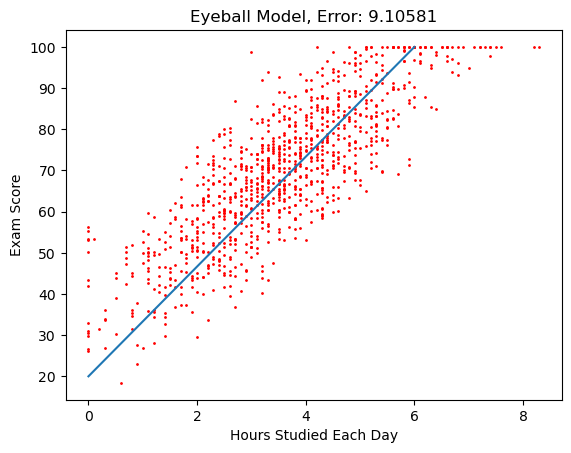

In [6]:
## guess model from earlier
## checking that the code is working

elis_model = ( 13.3, 20 )
elis_preds = gri_linModel( stu_df.study_hours_per_day, elis_model )
elis_model_err = gri_Err( stu_df.exam_score, elis_preds) 

fig, ax = plt.subplots()
ax.set_title(f"Eyeball Model, Error: {elis_model_err}")
ax.set_ylabel("Exam Score")
ax.set_xlabel("Hours Studied Each Day")
ax.plot(
    stu_df.study_hours_per_day, 
    stu_df.exam_score, 
    'ro', markersize = 1.0
)
elis_guess = ([0, 6], [20, 100])
ax.plot(elis_guess[0], elis_guess[1])
plt.show()

Above shown is the error of the model created from me simply "eyeballing" it. 

If we created a variety of models then tested the erorr accordingly, we could determine the model with the "best error" and therefore the most reliable in making future predictions. 

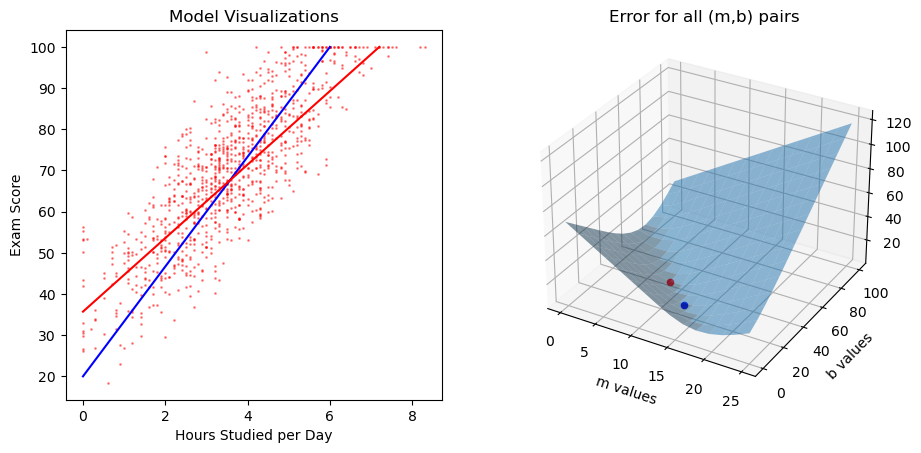

In [7]:
# Finding the best model

## Make an array of all possible (m, b) pairs. 
### Doing this is very computationally slow ... but worth it for the demonstration
density = 15
m = np.linspace(0, 25, density)  ## choice for m cannot be 0 or over say 25
b = np.linspace(0, 100, density) ## choice for b cannot be less than 0 or more than 100
m, b = np.meshgrid(m, b)         ## create mesh to plot with
z = np.zeros((density, density))

for i in range(0, density):
    for j in range(0, density):
        z[i, j] = gri_Err(
            targ = stu_df.exam_score,
            pred = gri_linModel(
                data = stu_df.study_hours_per_day,
                pair = (m[i,j], b[i,j])
            )
        )

## new figure object
fig, ax = plt.subplots(1, 2, figsize = plt.figaspect(0.45))

## remove one of the 2d figures, to be replaced with a 3d figure
ax[1].remove()
ax[1] = fig.add_subplot(1, 2, 2, projection = '3d')

## make a surface to plot on
surf = ax[1].plot_surface(m, b, z, alpha = 0.5)
ax[1].scatter(13.3, 20, elis_model_err, color = 'blue')

## finding the minimum
best_score = np.min(z)
best_model = ( m[ np.where(z == best_score) ], b[ np.where(z == best_score) ] )
ax[1].scatter( best_model[0][0], best_model[1][0], best_score, color = 'red')

ax[1].set_title("Error for all (m,b) pairs")
ax[1].set_xlabel("m values")
ax[1].set_ylabel("b values")

### second, 2d plot

ax[0].plot(stu_df.study_hours_per_day, stu_df.exam_score, 'ro', markersize = 1, alpha = 0.4)
ax[0].plot([0, 6], [20, 100], color = 'blue')
ax[0].plot(
    [0, (100-best_model[1][0])/best_model[0][0]], 
    [gri_linModel(0, best_model), [100]], 
    color = 'red'
)

ax[0].set_title("Model Visualizations")
ax[0].set_xlabel("Hours Studied per Day")
ax[0].set_ylabel("Exam Score")

plt.show()

Above, we see that my eyeball line (shown in blue) and the actual line of least error (shown in red) are very different.

Despite this, we note their overall error is fairly similar. 

The method chosen to find the minimum here is often not practical, so we'll view the best-guesses of other methods shown below. 

# Derivative-informed negative descent

The following method operates by checking a point's local neighborhood for the steepest descent. 

To be clear, this method is typically supplementary to others (as it optimizes for minimal derivative). It is included for demonstration purposes.

Stalled after 2 attempts.
MSE of final model: 8.146953136986449


<Figure size 640x480 with 0 Axes>

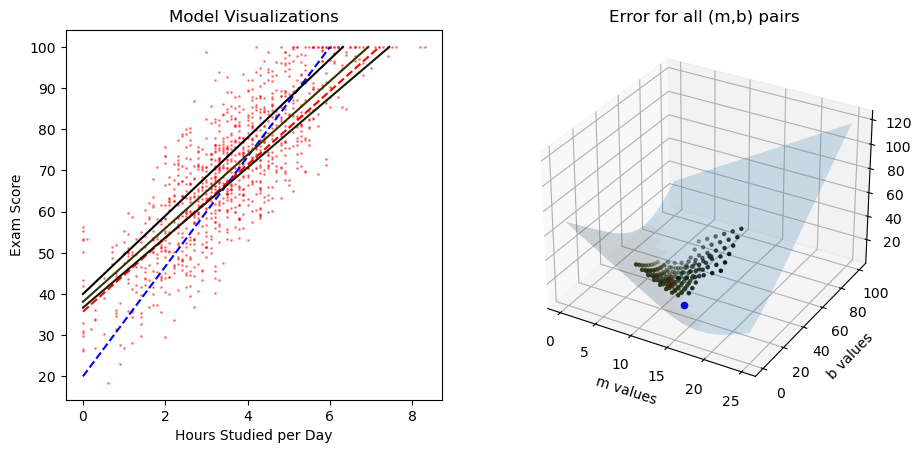

CPU times: total: 297 ms
Wall time: 307 ms


In [13]:
%%time
plt.clf()
# ===================
# Previous code
# ==================
mbound = (0, 25)   ## reasonable guesses for the bounds of the parameters
bbound = (0, 100)

density = 15
m = np.linspace(mbound[0], mbound[1], density)  ## choice for m cannot be 0 or over say 25
b = np.linspace(bbound[0], bbound[1], density) ## choice for b cannot be less than 0 or more than 100
m, b = np.meshgrid(m, b)         ## create mesh to plot with
z = np.zeros((density, density))

for i in range(0, density):
    for j in range(0, density):
        z[i, j] = gri_Err(
            targ = stu_df.exam_score,
            pred = gri_linModel(
                data = stu_df.study_hours_per_day,
                pair = (m[i,j], b[i,j])
            )
        )

## new figure object
fig, ax = plt.subplots(1, 2, figsize = plt.figaspect(0.45))

## remove one of the 2d figures, to be replaced with a 3d figure
ax[1].remove()
ax[1] = fig.add_subplot(1, 2, 2, projection = '3d')

## make a surface to plot on
surf = ax[1].plot_surface(m, b, z, alpha = 0.2)

ax[1].set_title("Error for all (m,b) pairs")
ax[1].set_xlabel("m values")
ax[1].set_ylabel("b values")

### second plot (2-dimensional)

ax[0].plot(stu_df.study_hours_per_day, stu_df.exam_score, 'ro', markersize = 1, alpha = 0.4)
ax[0].plot([0, 6], [20, 100], color = 'blue', ls = "--")
ax[0].plot(
    [0, (100-best_model[1][0])/best_model[0][0]], 
    [gri_linModel(0, best_model), [100]], 
    color = 'red',
    ls = "--"
)

ax[0].set_title("Model Visualizations")
ax[0].set_xlabel("Hours Studied per Day")
ax[0].set_ylabel("Exam Score")

#===========================================================================
# LEARNING ALGORITHM CODE
#===========================================================================

# make an n-dimensional bound to be within
#   ended up not being needed, turns out simpler ideas are better
#   leaving it in for the time being ... should be moved somewhere else later
def bounds(center, radius): 
    d = center.shape[0]
    shift = np.zeros((d, 2**d))
    for col in range(0, 2**d):
        for row in range(0, d):
            if col // 2**row % 2 == 0:  ## make a binary operand pattern
                shift[row][col] = 1
            else:
                shift[row][col] = -1
    return shift * radius + center
    
# make a dense disc around a point in space
def ndisc(center, radius, density):
    d = center.shape[0]
    l_bound = center - radius
    r_bound = center + radius
    ## init step
    temp = np.linspace(l_bound[0], r_bound[0], density)
    outbox = temp
    for i in range(1, d):
        temp = np.linspace(l_bound[i], r_bound[i], density)
        outbox = np.meshgrid(temp, outbox)
    return outbox


## ====================
## LOOP INITIALIZIATION
## ====================

### great guess for the center (midpoint)
center = np.array([
    [ (bbound[1]-bbound[0])/2 ],
    [ (mbound[1]-mbound[0])/2 ]
])

### testing guess (slower to find solution)
#center = np.array([
#        [ 80   ],
#        [ 22   ]
#    ])

radius = np.array([ [10], [3] ])

loop_density = 6

centerlist = []

MAXIT = 10

RADIUS_HYP = 10
DENSITY_HYP = 10

for iteration_number in range(0, MAXIT):
    scalar = iteration_number/MAXIT
    #current_color = (194/255*scalar, 100/255*scalar, 24/255*scalar)
    current_color = (1*scalar, 1*scalar, 0)

    ## make a dense disc around a point
    disc = ndisc(
        center = center,
        radius = radius, 
        density = loop_density
    )

    ## project the disc to the surface
    zcenter = gri_Err(
        targ = stu_df.exam_score,
        pred = gri_linModel(
            data = stu_df.study_hours_per_day,
            pair = (center[1], center[0])
        )
    )
    zlist = np.zeros((loop_density**2))
    count = 0
    for i in range(0, loop_density):
        for j in range(0, loop_density):
            zlist[count] = gri_Err(
                targ = stu_df.exam_score,
                pred = gri_linModel(
                    data = stu_df.study_hours_per_day,
                    pair = (disc[0][i,j], disc[1][i,j])
                )
            )
            count = count + 1

    ax[1].scatter(disc[0], disc[1], zlist, color = current_color, s = 5)

    ## assoc. each point on the disc with its derivative
    zlist_deriv = np.zeros((len(zlist)))
    xvec = disc[0][0]
    yvec = disc[1][:,0]
    tempmin = (np.inf, -1)
    for i in range(0, len(zlist)):
        zlist_deriv[i] = (zlist[i] - zcenter)/(xvec[i%loop_density]**2 + yvec[i%loop_density]**2)
        if zlist_deriv[i] < tempmin[0]:
            tempmin = (zlist_deriv[i], i%loop_density)
    
    ## plotting the learning alg. "thoughts"
    #centerlist.append( np.array([[center[1]], [center[0]], [zcenter]]) )
    new_zcenter = gri_Err(
            targ = stu_df.exam_score,
            pred = gri_linModel(
                data = stu_df.study_hours_per_day,
                pair = (yvec[tempmin[1]], xvec[tempmin[1]])
            )
        )
    ax[1].scatter(center[1], center[0], zcenter, color = 'green', s = 10)
    
    ## move in the direction of the steepest negative descent
    center_dupe = center
    center = np.array([
        [ yvec[tempmin[1]] ],
        [ xvec[tempmin[1]] ]
    ])
    ### adjust center and radius if the terrain is flatter
    radius = radius - RADIUS_HYP*np.linalg.norm(zlist_deriv)/np.linalg.norm(radius)
    loop_density = int(loop_density + np.ceil(DENSITY_HYP*np.linalg.norm(zlist_deriv)))
    if loop_density > 100:
        loop_density = 100
    
    
    ## plotting what we "are thinking"
    mval = xvec[tempmin[1]]
    bval = yvec[tempmin[1]]
    ax[0].plot(
        [ 0, (100-bval)/mval],
        [ bval, 100 ],
        color = current_color
    )
    
    ## check if the center isn't moving. If so, break
    if abs( np.linalg.norm(center) - np.linalg.norm(center_dupe) ) <= 2*np.linalg.norm(radius)/loop_density:
        print(f"Stalled after {iteration_number} attempts.")
        print(f"MSE of final model: {zcenter}")
        break
    
##=========================================
## PLOTTING CLARITY
##=========================================

ax[1].scatter(13.3, 20, elis_model_err, color = 'blue')
best_score = np.min(z)
best_model = ( m[ np.where(z == best_score) ], b[ np.where(z == best_score) ] )
ax[1].scatter( best_model[0][0], best_model[1][0], best_score, color = 'red')

plt.show()

Above, the dotted blue and red lines represent the "eyeball" guess and the theoretical best guess for the data. 

We see that the derivative quickly finds an excellent answer, but then  flies by the optimal one in its search for steepness.

Here, the increasing brightness of the yellow lines indicate the successive approach of the learning process. On the right, you can see each line's corresponding region (the line is taken from the center of that region). 

# Sparse bounded minimum

This process takes a totally different approach, rapidly finding the minimum in a sort of spiraling pattern. 

A more advanced version of this method can use the spiraling to essentially "skip" iterations, but that's a little advanced for the demo.

Stall after 12 attempts.
MSE for final model: 3


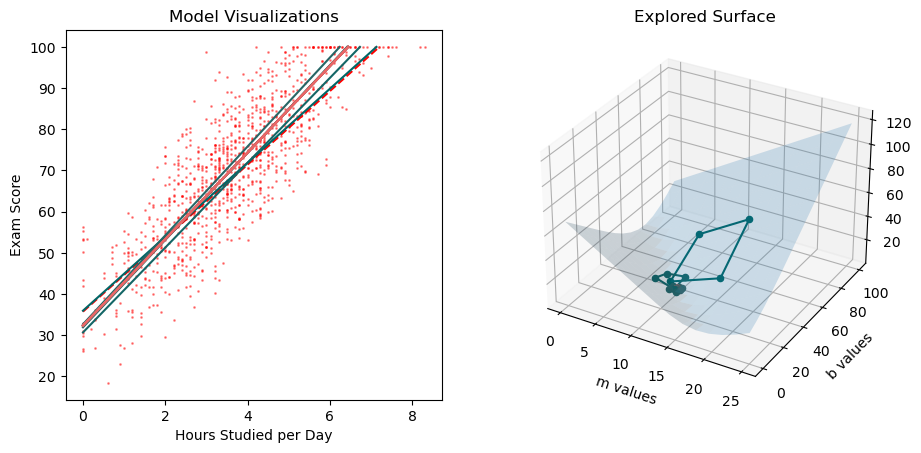

CPU times: total: 531 ms
Wall time: 519 ms


In [9]:
%%time
## ============================
## creating a plot to visualize
## ============================

density = 15
m = np.linspace(0, 25, density)  ## choice for m cannot be 0 or over say 25
b = np.linspace(0, 100, density) ## choice for b cannot be less than 0 or more than 100
m, b = np.meshgrid(m, b)         ## create mesh to plot with
z = np.zeros((density, density))

for i in range(0, density):
    for j in range(0, density):
        z[i, j] = gri_Err(
            targ = stu_df.exam_score,
            pred = gri_linModel(
                data = stu_df.study_hours_per_day,
                pair = (m[i,j], b[i,j])
            )
        )

## new figure object
fig, ax = plt.subplots(1, 2, figsize = plt.figaspect(0.45))

## remove one of the 2d figures, to be replaced with a 3d figure
ax[1].remove()
ax[1] = fig.add_subplot(1, 2, 2, projection = '3d')

## make a surface to plot on
surf = ax[1].plot_surface(m, b, z, alpha = 0.2)

ax[1].set_title("Explored Surface")
ax[1].set_xlabel("m values")
ax[1].set_ylabel("b values")

### second, 2d plot

ax[0].plot(stu_df.study_hours_per_day, stu_df.exam_score, 'ro', markersize = 1, alpha = 0.4)
ax[0].plot(
    [0, (100-best_model[1][0])/best_model[0][0]], 
    [gri_linModel(0, best_model), [100]], 
    color = 'red',
    ls = "--"
)

ax[0].set_title("Model Visualizations")
ax[0].set_xlabel("Hours Studied per Day")
ax[0].set_ylabel("Exam Score")

## =======================================
## loop setup 
## =======================================

mlim = np.array((0, 25)) ## initial target area -- can be guessed using other methods
blim = np.array((0, 100)) 
acc_targ = 1e-10

delta = np.array([max(mlim)-min(mlim), max(blim)-min(blim)])

xhat = np.array(( (mlim[0] + mlim[1])/2, (blim[0] + blim[1])/2 ))
n = 2
zhat1 = np.inf
zhat2 = np.inf


## ======================================
## loop execution 
## ======================================

MAXIT = 13
for iteration_number in range(0, MAXIT):
    scalar = iteration_number/MAXIT
    current_color = (1*scalar, 0.4, 0.4)
    
    dist = (3/8)**n
    dist_rect = np.array(
        [
            [dist, dist],
            [dist, -dist],
            [-dist, -dist],
            [-dist, dist]
        ]
    )
    xhat_rect = xhat + delta*dist_rect
    zval  = 0
    errs = np.zeros((1, 4))
    zhat1 = np.inf
    
    ## test each corner, use the corner with the minimum as the new center
    for k in range(0, 4):
        model_preds = gri_linModel(stu_df.study_hours_per_day, xhat_rect[k])
        current_error = gri_Err(stu_df.exam_score, model_preds)
        ax[1].scatter(xhat_rect[k][0], xhat_rect[k][1], current_error, color = current_color)
        errs[0][k] = current_error
    
        if current_error < zhat1:
            zhat1 = current_error
            zval = k
    
    ## making our square region using lines
    ax[1].plot(
        np.concatenate((xhat_rect[:,0], [xhat_rect[0,0]] )),
        np.concatenate((xhat_rect[:,1], [xhat_rect[0,1]] )),
        np.concatenate((errs[0], [errs[0][0]])),
        color = current_color,
        zorder = 1
    )
    
    ## making lines on the left-side plot
    ax[0].plot(
    [0, (100-xhat_rect[zval][1])/xhat_rect[zval][0]], 
    [gri_linModel(0, tuple(xhat_rect[zval])), 100], 
    color = current_color
    )
    
    xi = (zhat1 - zhat2)**2
    if xi < acc_targ:
        print(f"Stall after {iteration_number} attempts.")
        print(f"MSE for final model: {zval}")
        break
    
    n = n + 1
    zhat2 = zhat1
    xhat = xhat_rect[zval]

plt.show()

Note that the above model computes rapidly despite going through more iterations, and was about 50% more accurate than the derivative-method (although, this is mostly due to the nature of the given surface). 

These methods can easily be improved upon further, or even combined in an iterative process to produce more accurate results. 

# Closing

These models present the fundamentals of machine learning -- iterative processes which explore a surface or space to make some kind of decision. 

I hope you've enjoyed peeking in at these simple models to see how a machine really can "learn". 

$\text{J. "Eli" Shirley}$.